In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Manisha\DSA\Working Files\Sales_add.csv')

In [3]:
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


# 1) The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [5]:
from scipy.stats import ttest_ind

In [6]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [7]:
ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

Ttest_indResult(statistic=-12.995084451110875, pvalue=2.614368006904645e-16)

In [8]:
t_test,p_value = ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [9]:
p_value

2.614368006904645e-16

In [10]:
if p_value<0.05:
     print('Reject Null Hypotheses')
else:
    print('Accept Null Hypotheses')

Reject Null Hypotheses


Reject Null Hypotheses so after Stepping into Digital Marketing there is increase in sales

# 2) The company needs to check whether there is any dependency between the features “Region” and “Manager”

In [11]:
from scipy.stats import chi2_contingency

In [12]:
Dep_data = (data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [13]:
chi2_contingency(Dep_data)

Chi2ContingencyResult(statistic=50418.98816785626, pvalue=0.0, dof=21, expected_freq=array([[158243.59208   , 146308.74878564, 153225.29220049,
        150656.89571799, 163978.34352948, 154633.8689454 ,
        138397.96206394, 141947.26157215, 155971.42831125,
        131712.12704074, 142236.43178413, 178609.8854221 ,
        137421.37501155, 158767.00193451, 147841.311673  ,
        143015.66114775, 147437.57198762, 141058.95579207,
        140926.337703  , 143240.09176003, 161187.08587953,
        146461.76965765],
       [245067.40792   , 226584.25121436, 237295.70779951,
        233318.10428201, 253948.65647052, 239477.1310546 ,
        214333.03793606, 219829.73842785, 241548.57168875,
        203978.87295926, 220277.56821587, 276608.1145779 ,
        212820.62498845, 245877.99806549, 228957.688327  ,
        221484.33885225, 228332.42801238, 218454.04420793,
        218248.662297  , 221831.90823997, 249625.91412047,
        226821.23034235]]))

In [14]:
chi_stat,p_value1,dof,relation = chi2_contingency(Dep_data)

In [15]:
p_value1

0.0

In [16]:
if p_value1<0.05:
    print('Reject Null Hypotheses')
else:
    print('Accept Null Hypotheses')

Reject Null Hypotheses


In [17]:
data['Sales_Difference'] = (data['Sales_After_digital_add(in $)']-data['Sales_before_digital_add(in $)'])

In [18]:
data['Sales_Percentage'] = (data['Sales_Difference']/data['Sales_After_digital_add(in $)'])*100

In [19]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),Sales_Difference,Sales_Percentage
0,Month-1,Region - A,Manager - A,132921,270390,137469,50.841007
1,Month-2,Region - A,Manager - C,149559,223334,73775,33.033483
2,Month-3,Region - B,Manager - A,146278,244243,97965,40.109645
3,Month-4,Region - B,Manager - B,152167,231808,79641,34.356450
4,Month-5,Region - C,Manager - B,159525,258402,98877,38.264797


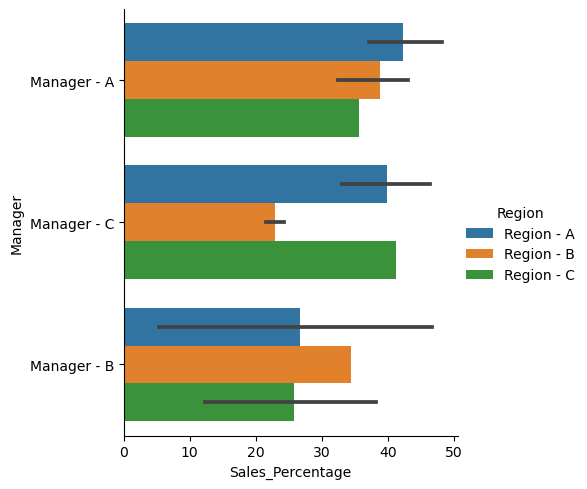

In [20]:
sns.catplot(data=data, y="Manager", x="Sales_Percentage",hue="Region",kind="bar")
plt.show()